In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [49]:
n_bins = 16

0.3411


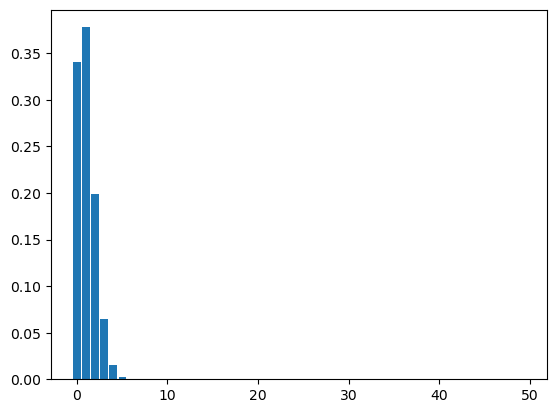

In [50]:
n_clusters = 50
pseudo_experiments = 10000
treshold =3
n_clusters_list=[]
for i in range(pseudo_experiments):
	n_clusters_list.append(np.sum(np.max(np.random.normal(0, 1, (n_clusters, n_bins)), axis=0)>treshold))
n_clusters_list = np.array(n_clusters_list)

plt.hist(n_clusters_list, bins=range(0, n_clusters+1), density=True, align='left', rwidth=0.8)

# probability to not have any cluster
p0 = np.sum(n_clusters_list==0)/len(n_clusters_list)
print(p0)


In [51]:
(np.random.uniform(0, 1, (3,))>p0)

array([False,  True, False])

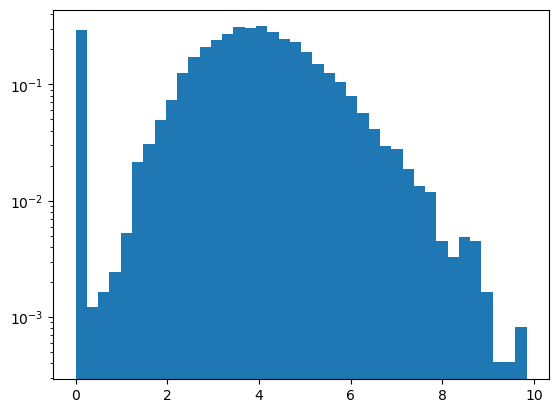

In [52]:
p=p0/5
ensambles = 1
ususal_scale = 2.3
smearing = 0

pseudo_experiments = 10000
np.random.seed(0)
ts_list=[]
np.random.uniform(0, 1, (n_bins, ensambles))
for i in range(pseudo_experiments):
	ts_list.append(np.mean(np.max(np.random.normal(0, ususal_scale, (n_bins, ensambles))*np.random.normal(1, smearing, (n_bins, ensambles)), axis=0)*(np.random.uniform(0, 1, (ensambles,))>p), axis=0))

plt.hist(ts_list, bins=40, density=True)
plt.yscale('log')


In [53]:
# Full experiment simlation 
n_bins = 16
n_clusters = 50
ensambles = 1
ususal_scale = 2.3

pseudo_experiments = 1000
np.random.seed(0)
for i in range(pseudo_experiments):
    # step one - clustering returns 50 clusters wiht 16 bins each and we do clustering "ensambles" times
	clusters = np.random.normal(0, ususal_scale, (n_bins, n_clusters, ensambles))
	# step two - check if any clusters are above threshold
	cluster_mask = np.max(clusters, axis=0)>treshold
	# step three - aggregate clusters
	cluster_mask = np.sum(cluster_mask, axis=0)

[0.         4.55400882 3.73510953 ... 3.0943027  4.49300722 4.99154468]


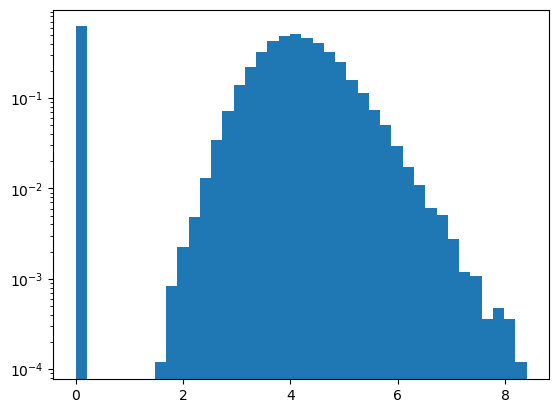

In [54]:
n_bins = 16
n_clusters = 50
ensambles = 1
ususal_scale = 1.35
threshold = 2.8
smearing=0.2

def one_experiment():
	clusters = np.random.normal(0, 1, (n_bins, n_clusters))
	#print(clusters)
	cluster_mask = np.max(clusters, axis=0)>threshold 
	if any(cluster_mask):
		#randomize_fractions = np.random.uniform(0, 1, (n_clusters,))
		#randomize_fractions = randomize_fractions/np.sum(randomize_fractions)
		signal_rich = clusters[:, cluster_mask][:, 0]
		return np.max(signal_rich*np.random.normal(ususal_scale, smearing, (1,)))
	else:
		return 0
	
pseudo_experiments = 40000
np.random.seed(0)
ts_list=np.empty((pseudo_experiments, ))
for i in range(pseudo_experiments):
	ts_list[i] = one_experiment()
print(ts_list)
plt.hist(ts_list, bins=40, density=True)
plt.yscale('log')

#print(cluster_mask)


In [55]:
np.random.normal(1, smearing, (1,))

array([1.09092508])

[0.         5.08993943 0.         ... 0.         3.79250762 6.09431315]


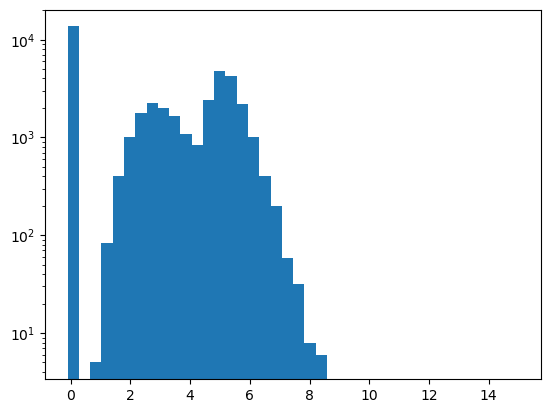

In [56]:
n_bins = 16
n_clusters = 50
ensambles = 1
ususal_scale = 1.61
threshold = 3
smearing=0.1

def one_experiment():
	clusters = np.random.normal(0, 1, (n_bins, n_clusters))
	#randomize_fractions = np.random.uniform(0, 1, (1, n_clusters))
	#randomize_fractions = randomize_fractions/np.sum(randomize_fractions)
	#clusters = clusters*np.sqrt(1/randomize_fractions)
	#print(clusters)
	cluster_mask = np.max(clusters, axis=0)>threshold 
	if any(cluster_mask):
		randomize_fractions = np.random.uniform(0, 2, (n_clusters,))
		#print(randomize_fractions)
		signal_rich = np.mean(clusters[:, cluster_mask], axis=1)
		#signal_rich = clusters[:, cluster_mask][:, 0]
		#signal_rich = np.sum(clusters[:, cluster_mask], axis=1)/np.sqrt(np.sum(cluster_mask))
		#signal_rich = np.sum(clusters[:, cluster_mask]*randomize_fractions[cluster_mask], axis=1)
		return np.max(signal_rich*np.random.normal(ususal_scale, smearing, (1,)))
	else:
		return 0
	
pseudo_experiments = 40000
np.random.seed(0)
ts_list=np.empty((pseudo_experiments, ))
for i in range(pseudo_experiments):
	ts_list[i] = one_experiment()
print(ts_list)
plt.hist(ts_list, bins=np.linspace(-0.1, 15, 41))
plt.yscale('log')
#plt.xlim(0, 10)

#print(cluster_mask)

In [57]:
import re
def extract_exponential_numbers(string):
    pattern = r"[-+]?\d*\.\d+[eE][-+]?\d+"
    exponential_numbers = re.findall(pattern, string)
    return exponential_numbers


In [58]:
sa=	"""[[-1.60661316e+00 -1.62531835e+00  3.17715279e-01  1.57501110e+00
   4.38873570e-01 -3.92439629e-01  2.40780701e-01  5.52286559e-01
  -4.99635680e-01 -5.88528637e-01  8.47260491e-01 -3.67766235e-01
  -7.57911988e-02  2.95961336e-01  1.19255964e+00  9.62440275e-01]
 [-2.46936960e+00 -1.41578016e+00 -1.93058958e+00 -6.04825999e-01
   7.26360893e-01 -1.08070514e+00 -1.17516004e+00 -9.37456999e-01
   1.82274772e+00  1.31154464e+00  1.02241809e+00  1.96422987e+00
   3.34886888e+00  1.02045499e+00  2.16481283e+00  2.77296743e+00]
 [ 1.29538562e+00 -2.06678068e+00 -3.45488905e-01  9.96119211e-03
   8.68719959e-01 -1.86972334e+00 -1.07212011e+00 -1.32471609e-01
   9.25902853e-01 -1.32388136e-02  4.33540220e-01  1.90901134e+00
  -8.69142666e-01  1.31777315e-01  1.09173935e+00  2.52332326e-01]
 [ 1.75227920e+00  1.35886321e+00  2.15498471e+00  5.20130007e-01
  -9.09399389e-02  1.14411691e-02 -1.27492110e-01 -1.72514002e+00
  -3.40739525e+00 -1.83212721e-01 -2.28410390e+00 -1.55359488e+00
   1.21883329e-01 -7.83846480e-01 -1.66880183e+00 -1.73745033e+00]
 [-2.05467696e+00  8.21641623e-01 -1.36081753e+00  1.85018515e+00
  -6.47983214e-01 -1.26682330e+00  1.25530660e+00 -4.89692686e-01
  -5.60651881e-01  6.92288624e-01  1.24220427e+00  1.14496185e+00
   1.37143941e+00 -1.11322441e+00 -1.73123122e+00  6.18377927e-01]
 [-5.44369094e+00 -2.05869068e+00 -1.96624228e+00 -1.26814729e+00
   7.22411726e-01 -2.27785696e-01  9.16304190e-01  5.05650927e-01
   1.10104100e+00  2.68172064e-01  2.39258914e+00  3.41700905e+00
   2.73719630e+00  2.10572521e+00  3.02214044e+00  3.51561612e+00]
 [-3.00838446e+00 -3.90175884e-01  7.30772922e-01 -4.59713631e-01
  -6.50459786e-01  8.13673774e-01  2.67160886e-01  4.43094640e-01
   1.61083876e+00 -1.54813818e+00  2.52225362e+00 -1.20173853e+00
   3.48838685e-01  1.07818603e-01  1.41044664e+00  1.00141379e+00]
 [ 6.73890752e-01  5.49594027e-01  1.35979151e+00 -1.97338115e+00
   6.16614943e-01 -1.47637848e+00  5.72130786e-01 -4.60487352e-01
  -2.32092906e+00  1.08775752e+00  1.06875356e-01 -4.60319568e-01
  -4.03049914e-01 -1.24646363e+00  1.24431947e+00  2.50059542e-01]
 [-1.35255729e-01 -1.55788224e+00  9.10254528e-01  2.82062719e-01
  -6.17810244e-01 -1.23828389e+00  2.85207572e-02 -5.72880368e-02
   7.16835889e-01  7.82884743e-01 -3.35821151e-01  7.17916154e-01
   8.78877592e-01 -2.27800700e-01  7.27102595e-01 -4.26819729e-01]
 [ 6.27645440e-01  9.29846547e-02 -3.13711741e-01  9.06367497e-01
  -5.86817153e-01 -5.01256823e-01 -2.22974896e-01 -4.37003685e-04
  -2.56453591e-01 -5.32834826e-01 -2.89409620e-01 -4.30446604e-01
  -4.30532578e-01 -1.55796603e-01 -1.07115958e-01  1.11613412e-01]
 [ 4.08739864e-01  1.79968749e+00  1.72443461e-01  9.93438410e-01
  -1.13046423e-01  1.47703242e+00 -1.92906000e-01  1.99126826e-02
  -4.59296744e-02 -2.34360095e+00 -2.09789626e+00 -1.83180945e+00
  -2.16741524e+00 -5.39415170e-01 -8.99221783e-01 -7.59970954e-01]
 [ 2.27495324e+00  1.63463449e+00  1.63568932e+00  7.16564275e-01
   4.59740807e-01  8.64763485e-01 -2.00405901e+00 -1.51139528e+00
  -1.49125367e+00 -6.99436081e-01 -2.00516869e+00 -1.72919823e+00
  -2.64368554e+00 -2.07215223e+00 -1.75576440e+00 -9.25988946e-01]
 [-2.24900610e+00 -3.37856608e-01 -9.17446041e-02  2.96396422e-01
   1.51561416e-01  6.80217059e-01  3.44430123e-01 -3.72560024e-01
   3.43671097e-01 -7.07104404e-01  4.91304473e-01  1.63376702e-02
   3.96146905e-01  1.51208660e+00  2.54503581e-01  7.27372892e-01]
 [ 1.52827923e-01  2.89262516e-02  1.02649173e+00  2.72556082e-01
   1.02941934e-01  9.85124451e-01 -6.63833860e-01 -7.37209984e-02
  -2.15675160e-01  6.23855480e-01  7.64754222e-03 -2.62933252e+00
  -6.51648845e-01 -6.79072851e-01 -5.20062620e-01 -1.64316311e+00]
 [-4.55419620e+00 -1.08073807e+00 -4.23619206e+00 -1.42769828e+00
   8.46848576e-01 -1.04993353e+00  6.15821449e-01  1.77046757e+00
   1.85522051e+00  2.24517532e+00  3.31568572e+00  2.11494243e+00
   2.26809324e+00  2.63486050e+00  1.85732830e+00  1.40530220e+00]
 [ 1.87138294e-01  8.11557215e-03  1.75298841e+00  6.84458133e-01
  -1.39137065e+00  5.64641457e-01  1.88051854e-01 -2.27315769e+00
   1.71306031e+00 -5.78604401e-02  4.43906566e-01 -2.96513413e+00
  -1.38056817e+00 -5.02089236e-01  2.54077411e-02 -8.60036883e-01]
 [-5.83046902e+00 -4.79557960e+00 -3.71547582e+00 -1.99096119e+00
  -3.44002804e-01 -2.27536089e-01  3.44800666e-01  2.29737230e+00
   3.51832623e+00  2.20821354e+00  5.88995605e+00  2.45691833e+00
   2.71583136e+00  3.25625216e+00  3.33545132e+00  4.23536891e+00]
 [ 1.68470369e+00  2.44779474e+00 -7.83811405e-01  5.55902586e-01
   2.34583419e+00 -5.72326438e-01 -1.51405850e+00 -2.63900096e+00
  -9.82461031e-01  6.49483959e-01 -1.01049847e+00 -1.84532681e+00
  -1.20439895e+00 -2.36152089e+00 -2.26744544e+00  3.14205207e-01]
 [-1.93703407e-03 -1.30972424e-01  8.40986475e-01  1.17684652e-02
  -7.59916450e-01 -6.48317250e-01  7.45250335e-01  1.93752336e-01
   6.57178977e-01 -1.21552314e+00 -1.19556823e+00  7.62119387e-01
  -6.10193992e-02 -1.29448514e-02 -3.87607922e-01 -3.63684956e-01]
 [ 9.50190581e-01 -9.03572788e-01 -1.54475805e+00  1.22058264e+00
  -9.83256693e-02  5.84845279e-01  5.18365990e-01  9.63368162e-01
  -3.18018618e-01  3.55557231e-01 -1.51137403e+00  8.13831780e-01
  -7.86168395e-01 -1.60248284e+00 -7.65463166e-01 -2.43142816e-01]
 [-2.05144797e+00  5.54527156e-01 -1.81974424e+00 -8.62970574e-01
  -1.39821464e+00  5.38941325e-01 -7.24314056e-01  1.00797216e+00
   9.29235521e-01 -1.86209136e+00  1.29530603e+00  1.91000094e+00
   5.80112250e-01  1.68733925e+00  2.72331765e+00  2.01070353e+00]
 [ 1.38251815e-01  9.36574277e-01  1.03352062e+00 -3.54095924e-01
  -2.39306924e-02  2.89952720e-01  1.54212005e-01 -6.38656366e-01
  -1.22602586e-01 -8.32155765e-01  8.16431154e-02 -1.87469105e+00
  -2.00602308e+00  6.34176802e-01  8.83455185e-02 -1.15299070e+00]
 [-4.53621853e+00 -3.17628255e+00 -1.74320675e+00 -1.57919475e+00
   4.48021376e-01  6.72118308e-01 -7.62087317e-01  1.40655013e+00
  -8.47259286e-01  1.88281037e+00  4.15792481e+00  3.05781470e+00
   2.86169572e+00  2.56341568e+00  8.54179311e-01  4.43672316e+00]
 [-4.13757044e+00 -4.58499340e+00 -3.14954022e+00 -2.97283891e-01
  -2.14008330e+00  1.42208539e+00  1.26738926e+00  1.33029357e+00
   3.48396320e+00  1.75842814e+00  2.35847110e+00  7.51594062e-01
   3.17932034e+00  2.69183851e+00  2.58097617e+00  4.13739267e+00]
 [-2.91723181e+00 -7.49185482e-01  2.72549014e-01 -6.09429225e-01
  -2.06348842e-01  1.21772179e+00  8.47077015e-01 -5.81748242e-01
  -4.71969540e-02  6.05856423e-01  9.78752760e-01 -6.78512826e-01
   1.00641567e+00  1.82644212e+00  4.10523780e-02  2.22519489e+00]
 [ 1.82623308e+00  3.32447265e+00  4.96395832e-01 -8.90883269e-01
   3.82401855e-01 -3.16279131e+00 -5.20523262e-01 -4.59821577e-01
  -4.32488865e-01  2.96526086e-01 -8.84180114e-01 -8.32793609e-01
  -1.30823027e+00 -2.41983882e+00 -2.83377638e-01 -2.17843924e+00]
 [-1.21897685e+00  8.02509117e-01  9.95540155e-01 -4.78229373e-01
   6.56680581e-01  7.48836043e-01 -7.44388705e-01  6.90423067e-01
  -2.99145593e-01 -9.46430315e-01 -2.71973174e+00 -6.57270083e-01
   1.54634464e+00  1.21356987e-01 -2.77111955e-01  8.97552213e-02]
 [ 3.29748727e-01  2.00245360e+00  4.16871807e-01  6.05200743e-01
  -3.50391136e-02 -1.74734399e+00  7.89150772e-01 -6.44250335e-01
  -7.09098973e-01 -4.13059812e-01 -6.55448587e-01 -1.87605408e+00
  -7.61983788e-02 -1.30376214e+00 -8.50536148e-01 -2.42748846e-02]
 [-7.42012125e+00 -4.33877663e+00 -2.64420845e+00 -1.74426565e+00
  -1.49172417e-01  1.50127596e+00  6.41641823e-01  1.19921012e+00
   2.39163421e+00  2.35164028e+00  3.81496393e+00  3.05304748e+00
   3.94696254e+00  3.41959453e+00  2.14031466e+00  5.48439544e+00]
 [-1.47772647e+00  2.68400289e-01 -2.27005091e+00  5.35891277e-01
   1.37619210e+00  2.02017787e+00  6.55599489e-01  7.03516809e-01
   2.89963669e-01 -9.29960907e-01 -1.61571182e+00 -1.32391110e+00
  -2.71849838e-01  1.50829343e+00  4.51327831e-01 -6.09644871e-01]
 [-5.56124774e+00  4.76730057e-01 -8.01737367e-01  8.59497819e-01
  -1.10063057e-01 -7.24018740e-01 -5.16558456e-02 -9.33073394e-01
   2.35934438e+00 -3.49319797e-02  1.95674905e+00  2.69353571e+00
   1.99321744e+00 -7.20574455e-01  1.67845207e+00  2.01585127e+00]
 [-7.15563026e+00 -4.07162126e+00 -2.92044903e+00  1.06888068e+00
  -1.13255088e+00 -1.33500595e+00 -5.70355481e-01  6.35255369e-01
   2.02189567e+00  2.16950097e+00  3.85899176e+00  5.30071428e+00
   4.65319037e+00  3.29406755e+00  4.53740022e+00  3.89764759e+00]
 [ 1.67951741e+00  1.08354485e+00 -2.22747495e+00 -2.47767498e-01
   1.83127405e-01  2.25152941e-01 -1.20464892e-01 -2.90927938e-01
   1.67093080e-01  6.99034193e-01 -6.30407378e-02 -1.20439154e+00
  -1.13405649e+00 -3.39153771e-01 -1.27862040e+00 -3.22537833e-01]
 [ 3.87603579e-01  2.19151881e-01  9.40623845e-01 -1.31107698e+00
   2.81324527e-01 -1.14914379e+00 -8.45336557e-01 -1.23546512e+00
   1.18856405e+00  6.85949363e-01  1.10756868e+00  9.05749293e-01
  -8.15869532e-01 -5.50873161e-02 -3.55165631e-01 -1.53246725e+00]
 [ 2.86001186e+00  5.64824060e-01 -8.60344311e-01  3.31737183e-01
   9.15155252e-01  6.45082448e-01 -1.69316426e+00 -1.55216080e+00
  -9.47559693e-01 -9.21219548e-01 -3.24115483e+00 -2.04869199e-01
   4.81498986e-01 -8.91464834e-01 -7.98093187e-01  4.92799598e-01]
 [ 1.78140989e+00  1.89791765e+00  3.66065848e-01  5.58520795e-01
   1.25495168e+00 -4.80779736e-01 -3.28120287e+00 -9.09810235e-01
  -5.43911603e-01  2.80615035e-01 -1.56899159e-01 -7.28156913e-01
  -2.75420370e+00 -3.49064007e+00 -1.09366608e-01 -8.54938918e-01]
 [-1.21033418e+00 -1.35735819e+00 -1.61779493e+00 -3.69008071e-01
   1.03597014e+00  1.16495412e+00 -2.12377812e+00  5.76569506e-01
   1.01665067e+00 -6.44399831e-01  1.53163438e+00  1.86459699e+00
   1.96777727e-01  6.38857332e-01  1.69634050e+00  3.44757983e-01]
 [-2.65317371e-01 -1.10457989e+00 -2.44029676e+00  2.88891281e+00
  -7.29740528e-03 -1.11802516e+00  1.09432075e+00  2.58516860e-01
  -4.74177759e-01 -1.60078354e-02  4.71412272e-01 -1.17867634e+00
  -5.62460815e-01  2.06680089e-01  1.14574960e+00  1.12492670e+00]
 [ 2.84080083e-02  2.40063956e+00  5.92984415e-01 -3.14882757e-01
  -1.43037912e-01 -1.00213003e+00  8.45402515e-01  3.05352263e-01
  -5.09592816e-01 -4.63993595e-01 -2.17391366e+00 -9.09428318e-02
  -1.03809399e-01 -1.58564119e+00 -1.74756294e+00 -1.20769439e+00]
 [-4.80125015e-01  3.17510653e+00  2.55956969e-01  1.66371053e+00
   7.56104701e-01 -6.49093107e-02  5.34474020e-01 -2.22208647e+00
  -1.59755086e+00 -1.24840884e+00 -1.87793554e+00 -3.87598782e-01
  -1.87710708e+00 -7.17617907e-01 -2.15617940e+00 -4.41942380e-01]
 [-5.05001894e+00 -3.13856528e+00 -3.83363522e+00 -2.39424300e+00
   9.20777278e-01 -7.07482333e-01  2.14942862e+00  1.67078254e+00
   1.98120740e+00  1.28596770e+00  2.98780676e+00  4.10954557e+00
   4.41271407e+00  8.64645889e-01  1.37650821e+00  4.23471993e+00]
 [-2.51125836e-01 -1.08211850e+00  3.59541283e-02 -6.06140699e-01
  -1.55817837e+00  2.95737828e-01  2.27302713e-01  2.71692801e-01
   1.28624078e+00  1.10771876e+00 -5.82468891e-01  1.20979729e+00
   4.82249749e-01  8.04567695e-01  3.92346856e-01 -1.03055272e+00]
 [ 2.39297460e-01  1.21817727e+00  1.41932589e+00 -1.28397968e+00
  -7.16546719e-01 -4.97991712e-01 -1.07850064e+00  2.79193094e-01
  -7.39383677e-01 -1.82775332e+00  3.89464953e-02  1.56451470e+00
   1.05059138e+00  1.83463561e-01 -1.17737807e-01 -1.92446842e+00]
 [ 1.15021714e+00  1.40991548e+00  1.10612740e+00  6.62487020e-01
   2.53324106e-01  7.48144386e-02 -5.49783677e-01 -1.19157340e+00
  -1.17160829e+00 -1.93362640e-01 -1.06198406e+00 -1.85585500e+00
   2.15320774e-01 -2.76195987e+00 -2.20639498e+00 -6.73564500e-01]
 [-1.00909271e+00  2.05879872e+00 -6.83086251e-01  1.71851536e+00
  -1.30310196e+00  6.72976076e-01 -1.36958946e-01 -2.41063952e+00
   1.66356558e+00 -4.49641532e-01 -7.81306223e-01  2.54415855e-01
   2.82096323e-01 -1.02553680e+00 -5.08437055e-01 -1.17774697e+00]
 [ 3.02006186e-01  8.99027264e-01  1.09768446e+00 -2.10809461e-01
   1.61069098e+00  8.03015523e-03 -1.61308114e+00  1.30632331e-01
   2.45115053e-01 -1.16031360e+00 -8.04234395e-01 -2.48265469e+00
   5.79952149e-02 -2.30135754e+00  1.38683035e+00 -2.15186751e+00]
 [-4.90923938e-01  2.10600844e+00 -1.10656505e+00 -1.00036352e+00
  -2.45888968e-01  2.03107847e-01 -5.06650776e-01 -1.02480324e+00
   7.33522695e-01 -5.55349262e-01 -1.18312355e+00  1.15504755e+00
   1.05277117e+00  9.39704978e-01 -1.01876287e+00  2.40396174e-01]
 [ 1.79491784e+00 -2.76315838e-02 -4.47518783e-01  4.57382679e-01
  -7.52096055e-01 -1.25912865e+00 -5.43181015e-01 -1.25270996e+00
  -1.24094491e-01 -3.18088117e-01  7.04464429e-01  1.85803823e-01
   1.07906169e-01  2.51348807e-01  3.59005036e-01 -3.43608034e-01]
 [ 2.00766172e+00 -1.14253133e-01  1.40364164e-01 -8.93123736e-01
   1.36824893e+00  5.02876837e-01 -6.94917621e-01 -9.02473819e-01
  -6.85143765e-01 -1.36806690e+00 -5.41703434e-01 -1.02781051e+00
  -3.70551630e-01 -8.23780232e-02 -4.64091435e-01 -5.08919679e-01]
 [-1.27581857e-01 -4.20522973e-02  1.33320729e+00  4.38185349e-01
  -9.51397046e-01 -1.07183095e+00 -1.25187817e+00 -2.90404165e-01
  -7.68728106e-03  3.21869537e-01  7.47699413e-01 -8.75064679e-02
  -1.69721427e-02  5.27671987e-01 -9.37018446e-01  5.19185227e-01]]"""


In [60]:
sa = """[[ 3.94549232e-01 -2.59548082e+00  3.33440593e-01  5.32812271e-01
  -5.85627090e-02  2.65977508e-01 -8.22727115e-01  1.23699776e-01
  -7.30796760e-01  7.58394434e-01  6.32173125e-01  4.81260382e-01
   7.29669073e-01 -3.08983274e-01  7.51114597e-01  1.34744353e+00]
 [-9.75692664e-01  4.02922901e-01  6.60541128e-01 -1.09063146e+00
   2.40953895e+00 -1.05139625e-01 -4.46493842e-01 -5.87796221e-01
  -8.68974448e-01 -9.88025700e-01  3.46268706e-02 -1.73462438e+00
  -1.14144305e-01  2.47145254e+00 -3.33566437e-01  1.20573966e+00]
 [ 1.65644510e+00  3.31442238e+00  3.63080510e-02 -6.66982606e-01
   1.40808271e+00 -8.50301569e-01 -1.18170842e+00 -3.58069754e-01
  -2.18158619e+00 -3.31289026e-01 -1.84589298e-01 -3.50651827e-01
  -1.12998613e+00 -5.05835891e+00 -4.72685157e-01 -1.01620579e+00]
 [-7.03832503e-01  1.62045505e+00 -1.88484192e+00 -1.15320789e+00
   2.75478552e+00  3.04353661e-01 -1.86115541e-01  3.32777280e+00
   9.54992496e-01  6.50852138e-01 -3.53568009e+00  2.22069087e+00
  -3.19014408e+00 -2.87422375e+00 -1.11474777e+00 -1.88854727e+00]
 [-1.05186039e+00 -1.38487260e+00  4.85673950e-01  1.84844833e+00
  -4.30241968e-01  4.69113720e-01 -2.21434281e+00 -8.56798046e-01
   1.92464305e+00 -1.56342563e+00 -3.68362877e-01 -4.26735051e-01
   1.55497529e+00  6.39112220e-02  2.84245561e+00  1.27461336e+00]
 [-8.85715211e+00 -2.43288532e+00 -4.06035734e+00 -2.21631983e+00
  -1.31876690e-01 -6.86186998e-01 -1.35963471e-01  2.63098607e+00
   4.99221624e+00  4.71899311e+00  3.59304914e+00  3.96112593e+00
   3.27615979e+00  4.39945502e+00  1.62202607e+00  4.78827745e+00]
 [ 8.39300416e-01 -4.57240402e-01  3.39577572e-01 -1.84023325e+00
  -1.06583723e+00  1.03430420e+00  9.57629466e-01 -7.25154695e-01
   3.99588606e-01 -8.95986562e-02 -1.26232565e+00 -1.01511475e+00
   9.51869188e-01  1.44944486e+00  1.20399486e+00 -4.61422285e-01]
 [-6.69183424e-01  1.78440333e+00 -6.16741005e-01 -5.10666601e-02
  -9.71441124e-01 -8.21217257e-01 -1.55694749e+00  2.15593613e-01
   1.32693544e-01 -6.54917101e-01  8.33100988e-01  2.64636434e+00
  -3.46538533e-01  9.44568151e-01 -7.05870755e-01  7.65703878e-01]
 [ 1.01295568e+00  1.32611830e+00  7.72440283e-01  6.27891477e-01
  -1.74140915e+00 -7.56267968e-01 -1.87570953e-02 -3.97778943e-01
  -5.60673057e-01 -1.19065069e+00 -4.63240508e-01  4.44526629e-01
  -7.55992361e-01 -4.73169462e-01 -1.09698770e+00  7.51439589e-01]
 [ 2.08160942e+00  4.31854620e+00  1.34651540e+00 -1.86440808e+00
  -2.21015940e-01  1.66272366e-01  1.28629585e+00 -2.53263344e+00
   3.21137434e-01 -7.99133301e-01 -3.77489284e+00 -1.57636142e+00
  -4.27965679e+00 -3.04033547e+00  1.37972577e-01 -1.63070375e+00]
 [ 3.42162165e+00 -2.45384806e-01 -2.22952314e-01 -3.74510877e+00
  -2.06467199e+00  2.75457545e-01 -4.41645685e-01  2.21797207e-01
  -9.27202526e-01  2.57975608e+00 -5.70839409e-01 -1.08971569e+00
   8.17544854e-01 -1.59906803e+00  1.83605536e+00  9.16779192e-01]
 [-1.34140267e+00  4.28275564e+00  1.39041640e+00 -4.64963415e-02
  -2.74146081e+00 -1.24338533e+00 -7.98863569e-01  2.22078364e+00
   1.56628921e-01 -9.16985995e-01 -1.71128539e+00 -1.87739272e+00
  -2.47723068e+00  8.67470477e-02 -7.01894155e-02  1.53594285e+00]
 [-1.04160606e+00  1.09891404e+00  5.38019168e-01 -5.02526341e-01
  -5.33976853e-01  8.62515546e-01  1.04098004e+00 -9.69737186e-01
   6.93542605e-01  1.16984785e+00 -5.24445582e-01  1.94848961e+00
  -1.15522504e+00 -8.20716976e-02 -2.61060723e+00 -2.98578245e+00]
 [ 7.79088580e-01 -3.08891313e+00 -9.34034453e-01  1.99814104e+00
  -1.39700017e-01  1.36099548e+00  2.85593539e-01  8.79812284e-01
   2.06268109e+00  5.68365763e-01  1.09199282e-01 -3.07601288e-01
  -2.91944509e+00 -2.27850918e+00  1.51425858e-01 -7.44638812e-01]
 [ 1.57911836e-01  1.75476949e+00  1.51494957e+00 -2.37795977e+00
  -6.39998611e-01 -1.21348272e-02 -1.16136882e+00 -1.31463292e+00
   5.89948676e-01 -3.27303056e-01 -1.61600589e+00  3.43272777e+00
  -2.45653279e-01 -1.79157740e+00  6.52524175e-01 -2.09472058e-01]
 [ 1.04388558e+00  7.84445084e-01  3.98574637e-02  2.40119182e+00
   2.67086927e+00 -2.34043298e+00 -7.62734891e-01 -5.53555108e-01
  -2.34978350e-02 -1.92115599e+00  1.18604800e-01 -3.71494122e+00
  -1.28900034e-01 -1.87555624e+00  3.61855938e-02 -2.34673866e+00]
 [-2.98600484e+00 -2.63162143e+00 -2.78103752e+00  1.68287067e+00
   7.12599087e-01  1.18661979e+00  1.59758982e+00 -6.62052005e-01
   1.26949296e-03 -2.47536408e-01  2.07654045e+00 -4.06901633e-01
   2.88096934e-01  2.94239640e+00  2.82079530e+00  3.09445368e+00]
 [-2.97415783e+00 -3.51818284e+00 -4.03045215e+00  8.05327896e-01
  -6.92464824e-01  1.19716115e+00 -6.95893067e-01  1.59728834e+00
   9.64894977e-01  7.53381430e-01  1.39541847e+00  4.76475154e+00
   2.94201707e+00  2.93735099e+00  2.44802319e+00  1.97229565e+00]
 [-5.60932002e+00 -3.39599014e+00 -2.10487381e+00 -8.43777536e-01
   8.05261270e-02 -2.10709389e-02 -4.83498862e-01  2.13423218e+00
   2.32543324e+00  6.53260889e-01  2.45727256e+00  3.92943269e+00
   3.03900035e+00  1.98646988e+00  3.22789470e+00  5.07657330e+00]
 [-9.15801199e-01 -2.47400451e+00 -2.50216756e+00  2.18924304e-02
   3.03292769e+00  1.16893454e+00  8.68681026e-01  5.96229473e-01
   1.23241166e+00  1.57585897e-02 -1.45417723e+00  3.56400814e-01
   6.49603620e-01 -4.49192731e-01  1.59656228e+00  3.88725861e-01]
 [-1.07751131e+00 -5.16205050e-01  1.36998857e+00 -1.95777888e+00
   2.78587208e+00 -4.48748168e-01  1.23219845e+00  4.18535875e-01
  -3.04995483e+00  3.04271527e-01  1.24112452e+00  8.52787113e-02
  -1.36128608e+00  1.95098660e+00 -8.97984498e-01 -1.25747807e+00]
 [-4.80345977e+00 -5.75055223e+00 -4.37681119e+00 -1.89240601e+00
   3.79372159e-02 -1.49247495e+00  1.50356552e+00  3.71433738e+00
   1.56134008e+00  1.67180548e+00  6.58634562e+00  2.50032294e+00
   4.84096369e+00  2.56893302e-01  4.50961156e+00  5.43668022e+00]
 [ 1.38020325e+00  1.50615807e+00  2.26285565e+00  7.27538064e-01
   3.88516240e-01 -2.24090770e+00  1.16847183e+00 -1.70574843e+00
  -2.37010591e+00  1.41444416e+00 -1.75393647e+00 -1.84976870e+00
  -9.94055921e-01  6.05662570e-01 -5.20441053e+00 -1.53488862e+00]
 [-8.18665217e-01  2.83325511e+00 -3.27326682e+00 -6.49678634e-01
   8.60886041e-01 -1.67881563e+00 -5.20359367e-01  1.73658919e+00
  -1.47688911e-01 -7.81746019e-01 -2.53421588e-01 -1.49410148e+00
   1.53131893e-01  1.45821582e+00  4.17732864e+00 -1.15404972e+00]
 [-2.14164877e+00  2.58147887e+00 -1.29185070e+00 -1.07995840e-01
   1.05056435e+00 -1.05268535e+00  6.14544196e-02 -5.61832885e-01
  -4.84153328e-01  6.02815417e-03  2.29374696e-01  1.19919434e+00
  -4.68742222e-01  2.38350100e+00  1.00108095e+00 -1.75287443e+00]
 [-3.67444247e-01 -6.30276060e-01 -1.81369019e-01  4.44524055e-01
  -1.01858239e+00 -7.95214124e-01 -2.35100781e-01 -1.36791315e-01
   2.15080776e+00  9.51028018e-01  3.46065340e-02  5.89407004e-01
  -3.86414263e-01  1.10139558e+00 -7.60540903e-01  4.23139691e-01]
 [ 1.12979530e-01  1.31253072e+00 -5.45091523e-01 -1.19625942e+00
   1.40566642e+00  1.47033404e+00  4.99216633e-01 -9.07715743e-01
   1.43961377e-01 -1.09146961e+00 -1.56313840e+00  1.79092217e+00
  -1.56827391e+00 -8.78742256e-01 -2.30543319e+00  2.16654717e-01]
 [-2.77213119e-01 -3.47700108e-01  1.55931539e+00 -2.58958334e-01
  -5.17345843e-01 -3.01975908e-01  1.68328219e+00  7.89478115e-01
  -3.69634414e+00  1.24504948e+00  1.09055358e+00 -1.38394696e+00
  -2.95911904e-01  6.36714512e-01 -6.25558544e-01 -9.11411727e-01]
 [ 1.77542222e+00  4.38777152e-01  2.22675773e+00  6.09107414e-01
  -8.64413106e-01 -1.88122863e+00 -3.28815064e-01 -3.10291905e+00
   2.15621307e+00  3.67200482e-01 -3.80745839e-01 -6.77260753e-01
  -2.77108773e+00 -1.33630757e+00  7.91159826e-01 -2.99380413e+00]
 [-2.48299691e+00  1.03709399e+00  9.04179543e-01 -3.25466919e-01
   1.82482287e+00  1.75319996e+00 -2.76311182e+00 -4.15557673e-01
   1.38763074e+00  5.37887674e-01  1.89397547e+00  2.00488887e-01
  -2.80928534e+00 -9.98860226e-01 -2.22926458e-01 -2.13441182e+00]
 [ 8.10940092e-01 -2.81204081e+00 -6.60194215e-01 -2.69343271e-02
   5.01821000e-02 -1.75067994e+00  1.82993384e+00  3.54313298e-01
   1.20194182e+00  2.02767589e-01 -3.48371682e+00  3.55566600e+00
  -1.78179070e+00  1.00435827e+00  1.31919235e+00  2.13495477e+00]
 [ 1.56717554e+00  1.65334537e-01  1.50129125e+00 -1.68795302e-01
   5.51975461e-01 -5.93411896e-01  3.59785495e-01  1.75955070e+00
  -1.24377769e+00 -1.79495513e+00 -3.12008694e+00 -2.21523884e+00
  -1.84866212e+00  9.94149729e-01 -9.87605856e-02 -9.18912167e-01]
 [-6.76917561e+00 -1.47770653e+00 -2.37352888e+00  3.05400551e-01
   6.08685280e-01  1.31692915e+00 -8.58701487e-01  1.17545130e+00
   1.54429337e+00  1.34408291e+00  6.27024803e-01  5.20351511e+00
   1.22277665e+00  3.90965663e+00  1.52982865e+00  2.92545402e+00]
 [ 2.15771391e+00 -1.24095290e-01 -9.97081960e-02  1.56601898e+00
  -3.81657406e+00 -9.71984412e-01  2.11299063e+00 -1.58653051e+00
  -9.84962647e-01  2.81264024e-01  1.41028747e+00  3.73139696e-01
  -1.73458560e-01 -1.17449286e+00 -1.60802317e+00 -5.39739908e-01]
 [-5.46790938e+00 -1.71660672e+00 -1.93509603e+00  1.47107020e+00
   9.39935599e-01  3.24124114e-01 -7.86867940e-01  1.39459483e+00
   5.67726346e-01 -9.99187534e-01  3.08394445e+00  3.88776040e+00
   9.14775336e-01  1.46771769e+00  1.50196240e+00  3.72536893e+00]
 [-9.95690179e-01 -2.96808956e+00  1.26700355e+00  7.50046201e-01
  -5.33578138e-01 -6.28358663e-01  5.38624953e-01  2.63234995e+00
   1.24455467e+00 -2.05016314e-01  1.67305916e+00 -2.28112977e+00
  -5.17079471e-01  2.05999637e+00 -1.76638725e+00  3.15214115e-01]
 [-2.59304380e+00 -1.55315624e+00 -1.57535065e+00  5.13292326e-01
   4.96296226e-01 -1.39847503e+00 -3.41574549e-01  2.66945214e+00
   1.69806918e+00  1.54585675e+00  1.23196564e+00  4.01168926e+00
   8.93491554e-01  9.46129815e-02 -5.57970038e-01 -1.90044635e+00]
 [-6.31103067e-01  3.99391422e+00 -1.14758270e+00  2.79243099e+00
   1.11121435e+00  1.19264852e+00  5.74153620e-01 -1.10515783e+00
  -5.19396748e-01 -3.54439581e+00  3.00441739e-02 -1.80948804e+00
  -3.98575720e+00 -1.63549307e+00 -2.28881495e+00 -2.42175760e+00]
 [ 1.48382767e+00 -5.96126518e-01 -1.72611348e-01 -8.88947862e-01
  -2.05147832e-01  1.68906538e+00  1.06257373e+00 -2.46688221e-01
   4.57444932e-01 -1.00882689e+00  4.43089515e-01 -2.85902945e+00
  -1.46244513e+00  1.81887067e-01 -1.28966630e+00  8.76229893e-01]
 [-4.38350412e+00  9.90885857e-01 -4.59495190e+00 -2.66351935e+00
  -5.89935395e-01  3.79657459e-01  8.02041117e-01  8.56133259e-01
   3.55716881e+00  2.69258945e+00  2.56220614e+00  2.85515231e+00
   1.44960838e+00  1.97529001e+00  2.06390654e+00 -1.57146277e-01]
 [-6.40785864e-01  2.76333875e+00  5.76899440e-01 -4.79364508e-01
  -2.05540486e-01  6.38166267e-02 -3.69422832e-01 -6.25147938e-04
  -1.84987587e+00 -8.64285580e-01 -8.88615267e-01  4.52606971e-01
   4.80924361e-01 -1.11396362e+00 -9.82926964e-01  8.38901971e-01]
 [ 2.54401823e+00  3.66235478e-01  1.99233074e+00  2.47405845e-01
   7.47666026e-01  2.81869331e-02 -2.54247817e+00 -1.82699593e+00
  -1.61128762e+00  9.17246129e-01 -1.73385060e+00 -7.78403997e-01
   1.42559609e-01 -1.84782632e+00 -2.64673834e-01 -2.97462863e+00]
 [ 1.07578950e-01  1.71210142e+00 -7.51182855e-01  3.69979580e-01
   2.44967608e+00  4.89202521e-01 -8.10520577e-01 -3.91518024e-01
  -1.14496944e+00  1.45187595e+00 -1.73293659e+00  1.20493062e+00
  -4.45731483e+00 -8.79622301e-01  5.17639118e-01 -4.53939602e+00]
 [ 8.06601872e-01 -1.24276989e+00  4.47579557e-01  2.25456990e+00
  -6.91839815e-01  6.87672996e-01  1.36113657e+00  6.09250993e-01
  -2.98083079e+00  8.91457214e-01 -4.14822633e-02  1.68019194e+00
  -2.51965518e+00 -2.54029282e+00 -5.38357996e+00  1.50137895e-01]
 [ 5.54197756e-01 -1.23822660e+00 -4.55562497e-01  9.26966220e-02
   2.25619049e-01 -9.35063499e-01 -1.54769785e+00  1.22761295e+00
   2.85359528e+00  9.71228305e-01 -3.77410920e+00  1.67396768e+00
  -2.30069973e-01 -7.86891892e-01 -3.46115999e-01  1.84767743e+00]
 [ 2.66538386e+00  2.01205247e+00  6.56268778e-01  1.83489125e-01
  -7.80933098e-01 -9.20881566e-01 -5.64184871e-01 -1.19297347e+00
  -6.02377585e-01 -8.91662176e-01 -4.79245164e+00 -2.10777610e-01
   7.58883460e-01 -2.88972726e+00  6.44706273e-01  1.86279596e-01]
 [ 5.36989378e-01 -7.64591310e-01  1.63971771e+00  8.52850384e-01
   2.06025831e-01 -1.56946641e+00 -2.76874075e+00  1.85638415e+00
  -1.27531298e+00 -6.58333403e-01  5.99373470e-01 -7.76492701e-01
  -9.26929091e-01 -3.79362109e-01  1.71138557e+00  1.09396431e+00]
 [-6.42121361e-01  4.49090409e-01  2.84136665e-01  3.91288770e-01
   1.59460299e+00  4.39036145e-01  9.86666163e-01  7.61791981e-01
  -1.08301908e+00  2.73590907e-01 -6.40197092e-01 -1.20506915e+00
  -3.30371756e-01 -2.09155292e+00 -2.05165059e+00 -1.14222889e+00]
 [ 2.14979831e+00 -4.85103074e-01  2.32126555e+00  1.44014436e+00
  -1.04921552e+00  1.10995916e+00 -1.88248897e+00  4.40796694e-01
  -1.63479100e+00 -1.64218020e+00 -3.25812997e+00 -7.83457960e-01
   1.02632817e+00  3.94814920e-01 -3.34238283e+00 -1.66436124e+00]
 [ 5.89501976e-01  9.01719423e-01  8.60189248e-02  1.22416477e+00
   6.06711267e-01  6.31666120e-01  1.77009543e+00 -2.35631791e-01
  -2.78808456e+00 -7.47357051e-01 -1.09588439e-01 -2.28726906e+00
  -5.43838192e-01 -8.03152759e-01 -2.26987472e+00 -1.58038750e+00]]"""

mean: -0.03656750541176001
std: 1.8288948750407508
std ign: 1.6235258417084015
pos std: 1.7899281165097463
neg std: 1.8676191947465821
21


(0.001, 1.0)

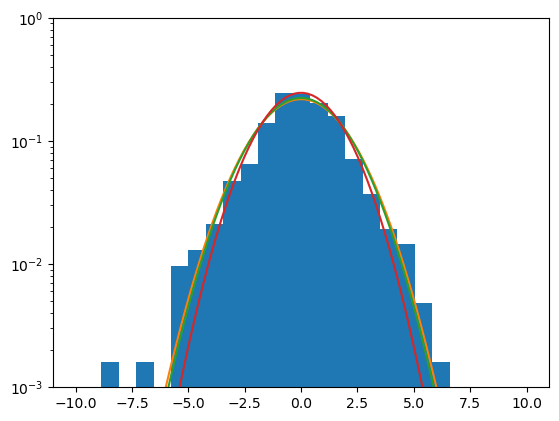

In [63]:
from utils.robust_estimators import std_ignore_outliers
from scipy.stats import t
a = extract_exponential_numbers(sa)
a=np.array([float(i) for i in a])
def positive_std(array):
    mean = np.mean(array)
    positive_deviation = np.maximum(array - mean, 0)
    positive_deviation[positive_deviation==0] = np.nan
    positive_variance = np.nanmean(positive_deviation**2)
    positive_std_deviation = np.sqrt(positive_variance)
    return positive_std_deviation
print("mean:", np.mean(a))
print("std:", np.std(a))
print("std ign:", std_ignore_outliers(a))
print("pos std:", positive_std(a))
print("neg std:", positive_std(-a))
histt = plt.hist(a, bins=20, density=True)
plt.plot(np.linspace(-10,10,100), stats.norm.pdf(np.linspace(-10,10,100), 0, np.std(a)))
plt.plot(np.linspace(-10,10,100), stats.norm.pdf(np.linspace(-10,10,100), 0, positive_std(a)))
plt.plot(np.linspace(-10,10,100), stats.norm.pdf(np.linspace(-10,10,100), 0, std_ignore_outliers(a)))
print(len(histt[1]))
plt.yscale("log")
plt.ylim(1e-3, 1e0)

(6.426439114484712, -0.017814454843449366, 1.528815509884498)


(array([0.00051906, 0.00038929, 0.00155717, 0.00311433, 0.00519055,
        0.01038111, 0.02231939, 0.04321137, 0.08810967, 0.15234278,
        0.21748424, 0.24447513, 0.20658408, 0.14170214, 0.07733927,
        0.04373042, 0.02115151, 0.00947276, 0.00389292, 0.00207622]),
 array([-8.85715211, -8.08497722, -7.31280234, -6.54062745, -5.76845256,
        -4.99627768, -4.22410279, -3.4519279 , -2.67975302, -1.90757813,
        -1.13540324, -0.36322836,  0.40894653,  1.18112141,  1.9532963 ,
         2.72547119,  3.49764607,  4.26982096,  5.04199585,  5.81417073,
         6.58634562]),
 <BarContainer object of 20 artists>)

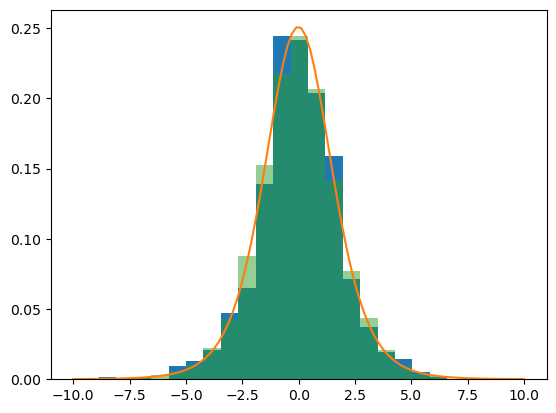

In [62]:
par = t.fit(a)
print(par)
histt = plt.hist(a, bins=20, density=True)
plt.plot(np.linspace(-10,10,100), stats.t.pdf(np.linspace(-10,10,100), *par))
plt.hist((np.random.standard_t(par[0], size=(10000, )) + par[1])* par[2], bins= histt[1], alpha=0.5, density=True)

(4.588789659085548, 9.374795053520787e-05, 1.2388028556458994)


(array([0.00564966, 0.00687784, 0.00982549, 0.01375568, 0.02407245,
        0.04347779, 0.07541063, 0.12773136, 0.19454469, 0.29943178,
        0.3318559 , 0.38000079, 0.32817134, 0.23974194, 0.14959307,
        0.08695558, 0.05133818, 0.03045902, 0.01547515, 0.01031676]),
 array([-4.59838234, -4.18595765, -3.77353296, -3.36110827, -2.94868358,
        -2.53625888, -2.12383419, -1.7114095 , -1.29898481, -0.88656011,
        -0.47413542, -0.06171073,  0.35071396,  0.76313865,  1.17556335,
         1.58798804,  2.00041273,  2.41283742,  2.82526212,  3.23768681,
         3.6501115 ]),
 <BarContainer object of 20 artists>)

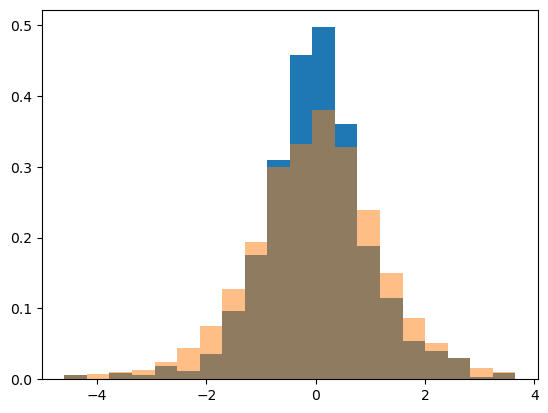

In [ ]:
par = t.fit(a)
print(par)
histt = plt.hist(a/np.std(a), bins=20, density=True)
#plt.plot(np.linspace(-10,10,100), stats.t.pdf(np.linspace(-10,10,100), *par))
plt.hist(np.random.standard_t(par[0], size=(10000, )), bins= histt[1], alpha=0.5, density=True)

In [72]:
n=1000000
k=50
print(np.sum(np.random.standard_t(par[0], size=(n, ))>3)/n)
print(np.sum(np.random.normal(size=(n, ))>3)/n)
l = np.random.normal(size=(n, k))
l=l-np.mean(l, axis=1)[:, np.newaxis]
l=l/np.std(l, axis=1)[:, np.newaxis]
print(np.sum(l>3)/(n*k))
#print(np.sum(a/np.std(a)>3)/np.sum(a>-10000))

0.011077
0.001331
0.00095522


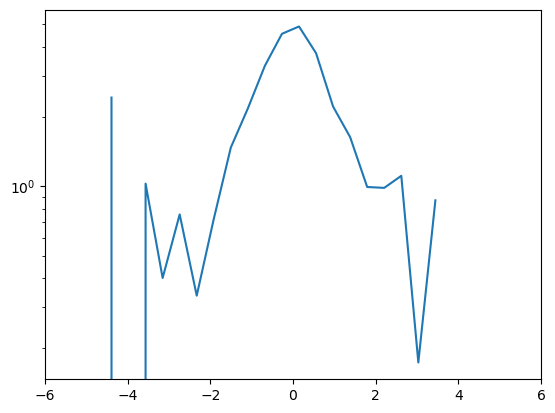

In [ ]:



#pltot ratios of likelihoods
x= histt[1][:-1] + np.diff(histt[1])/2
bin_width = np.diff(histt[1])[0]
plt.figure()
plt.plot(x, histt[0]/bin_width/stats.norm.pdf(x, 0, np.std(a)))
plt.xlim(-6,6)
plt.yscale('log')

(array([0.35650839, 0.47534452, 0.43573247, 0.23767226, 0.19806022,
        0.03961204, 0.03961204, 0.07922409, 0.03961204, 0.07922409]),
 array([0.84098648, 1.34588343, 1.85078039, 2.35567735, 2.86057431,
        3.36547126, 3.87036822, 4.37526518, 4.88016213, 5.38505909,
        5.88995605]),
 <BarContainer object of 10 artists>)

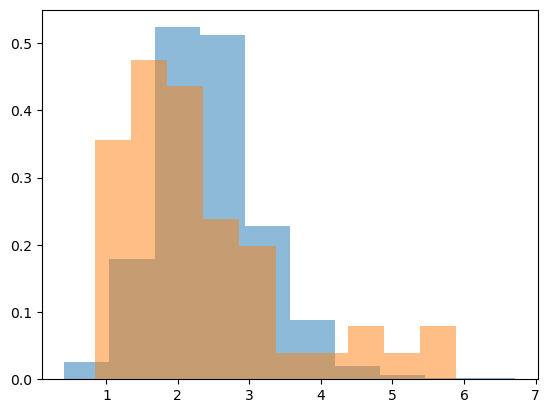

In [ ]:
b=a.reshape((50, 16))
plt.hist(np.max(np.random.normal(0, 1.4, (1000, 16)), axis=1), density=True, alpha=0.5)
plt.hist(np.max(b, axis=1), density=True, alpha=0.5)


In [83]:
ns = np.array([1000, 900, 700, 400, 100])
f = [0.1, 0.2, 0.3, 0.4]
samples=[]
for n in ns:
	np.random.multinomial(n, f)
	samples.append(np.random.multinomial(n, f))

samples = np.stack(samples)
print(samples)
print(samples.sum(axis=1))

[[102 216 307 375]
 [ 74 181 259 386]
 [ 64 140 224 272]
 [ 32  59 143 166]
 [  9  20  26  45]]
[1000  900  700  400  100]
